### Computer vision in Pytorch

### CV libraries 

The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.

In [51]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # numpy array to tensors

# Visualization
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)


2.0.0+cu117
0.15.1+cu117


## 1. getting Dataset

In [2]:
## Setup training data

train_data = datasets.FashionMNIST(
    root = "data", # where to download
    train = True, # do we want to download training datasets
    download= True,
    transform=ToTensor(), # transform the data , tensors
    target_transform=None # transforming the labels
)

test_data = datasets.FashionMNIST(
    root="data",
    train = False, # do we want to download training datasets
    download= True,
    transform=ToTensor(), # transform the data , tensors
    target_transform=None # transforming the labels
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
print(label, image.shape)

9 torch.Size([1, 28, 28])


In [5]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.root

'data'

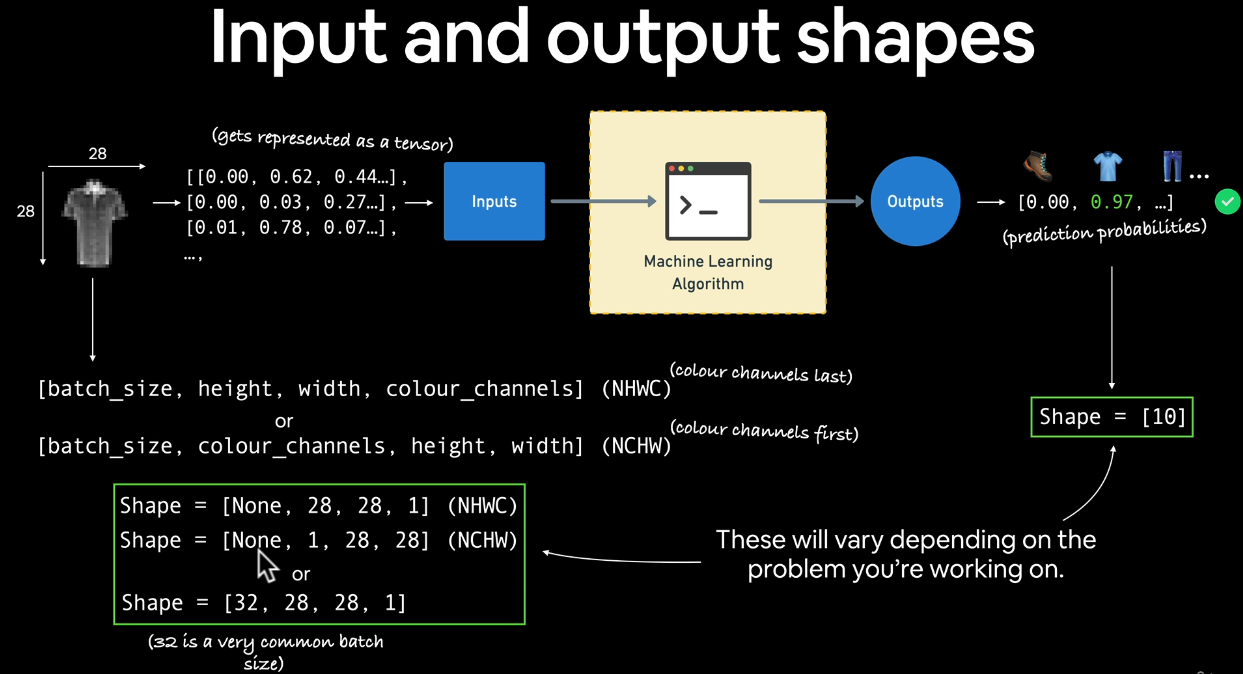

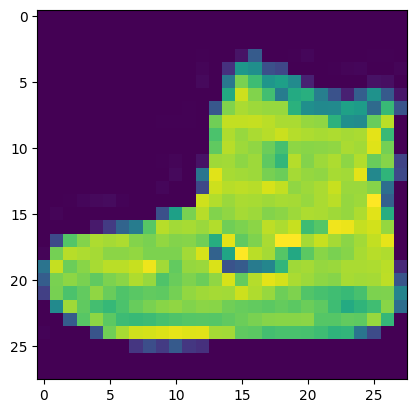

In [9]:
# Visualize the data

image, label = train_data[0]
plt.imshow(image.squeeze())

In [10]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [11]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

Preapare dataloader - turn data into batches/ mini-batches

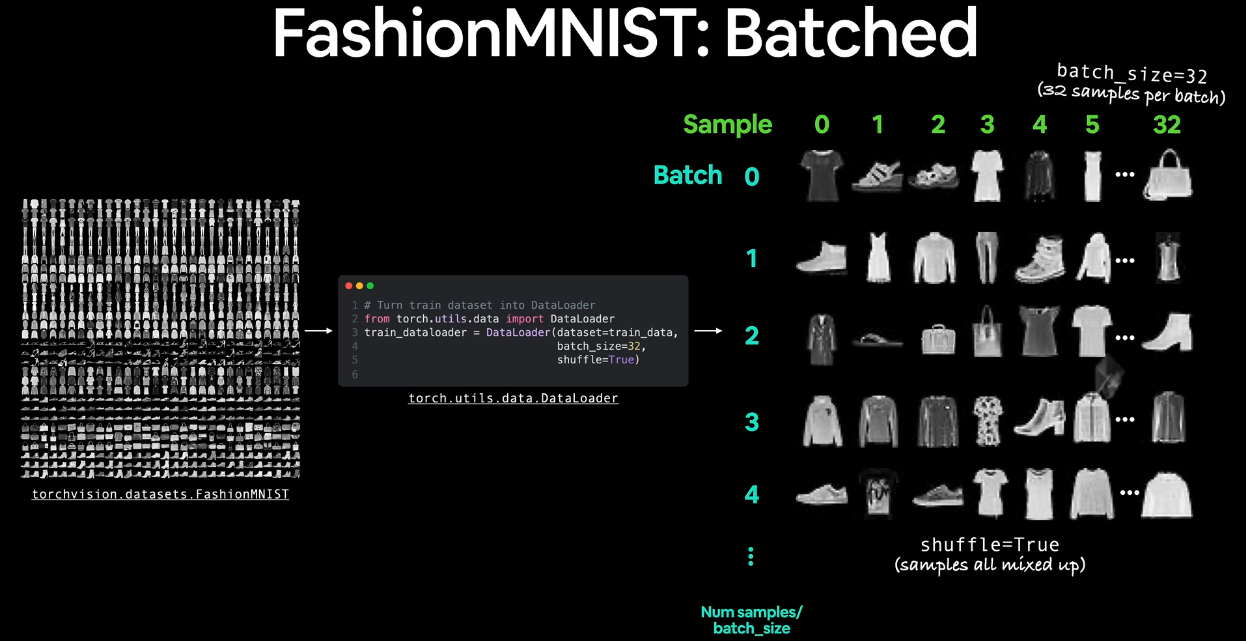

In [12]:
from torch.utils.data.dataloader import DataLoader

In [13]:
BATCH_SIZE = 32

# turn datasets into iterables. (batches)

train_dataloader = DataLoader(train_data, BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, BATCH_SIZE, shuffle=False)

In [14]:
train_dataloader.batch_size

32

In [15]:
test_dataloader.batch_size

32

In [16]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [17]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

#### 3. Build baseLine model

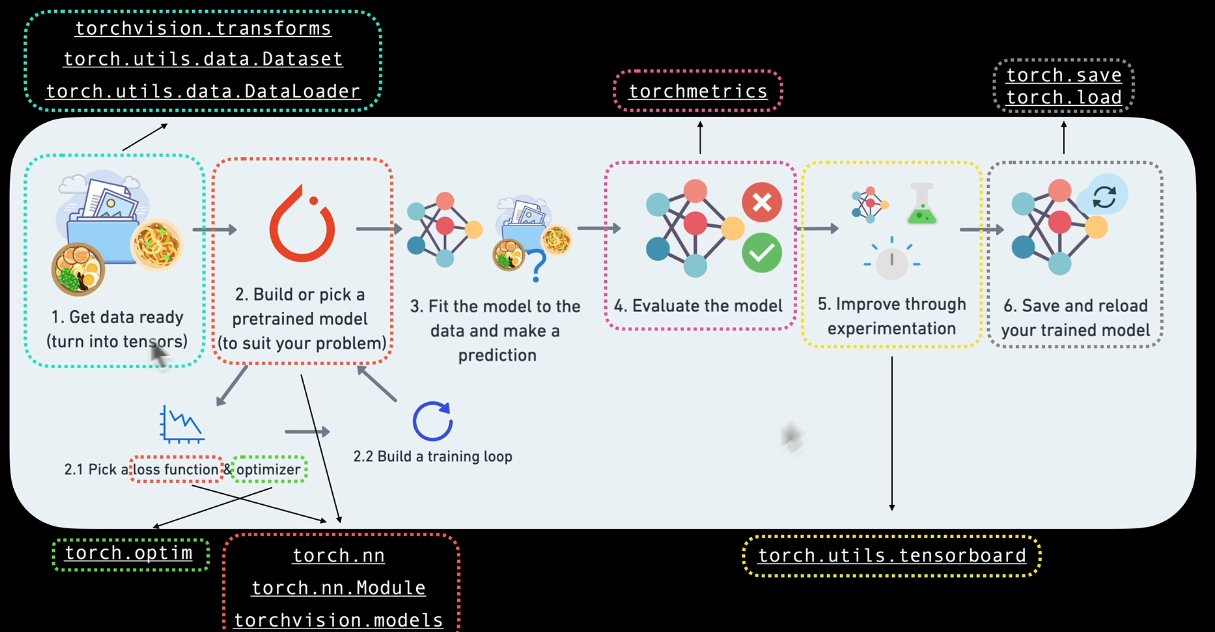

In [18]:
# create flatten layer

flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(x.shape)

print(output.shape)
print(output.squeeze().shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])
torch.Size([784])


In [19]:
from torch import nn

class FashionMNISTV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape:int) -> None:
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(), # No learnable paras
            
            nn.Linear(in_features=input_shape, out_features= hidden_units),
            nn.Linear(in_features=hidden_units, out_features= output_shape)
        )


    def forward(self, x):
        return self.layer_stack(x)

In [20]:
torch.manual_seed(42)


# setup model with input params

model_0 = FashionMNISTV0(
    input_shape=(28*28), hidden_units= 50, output_shape=len(class_names) # 10
)

model_0.to("cpu")

model_0

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=50, bias=True)
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1,1,28,28])

model_0(dummy_x)

tensor([[-0.2053,  0.0624, -0.1562,  0.0522,  0.1489, -0.1266,  0.0271, -0.1860,
         -0.0149,  0.3123]], grad_fn=<AddmmBackward0>)

In [78]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0070,  0.0020,  0.0281,  ...,  0.0157,  0.0271, -0.0046],
                      [-0.0344, -0.0180, -0.0178,  ...,  0.0206, -0.0156,  0.0281],
                      [-0.0340, -0.0340, -0.0144,  ...,  0.0223,  0.0007,  0.0267]])),
             ('layer_stack.1.bias',
              tensor([-0.0109,  0.0063,  0.0341, -0.0029,  0.0198,  0.0254, -0.0158,  0.0052,
                       0.0037, -0.0223,  0.0217, -0.0176, -0.0022, -0.0033,  0.0196,  0.0295,
                      -0.0008,  0.0006, -0.0248, -0.0032,  0.0045,  0.0307, -0.0309,  0.0198,
                      -0.0132, -0.0084,  0.0310,  0.0062,  0.0304, -0.0228, -0.0196, -0.0227,
                

Loss, optimizer and evaluation metrics

In [86]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [87]:
from helper_functions import accuracy_fn

In [88]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1
                            )

# accuracy_fn()

In [89]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

Creating training Loop + TrainingModelon batches of data
1. Loop through epochs
2. Loop through training batches, perform training steps,
3. calculate train loss / batch
4. loop thriugh test batches, perform testing steps
5. calculate test loss/ batch

In [90]:
len(train_dataloader)

1875

In [91]:
from tqdm.auto import tqdm

In [92]:
# Import tqdm for progress bar

from tqdm.auto import tqdm

torch.manual_seed(42)

train_time_start_on_cpu = timer()

epochs = 3

# Create traina nd test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---")


    # Training

    train_loss = 0

    for batch, (image, label) in enumerate(train_dataloader):
        
        model_0.train()

        # 1. forward pass

        y_pred = model_0.forward(image)

        # calculate loss

        loss = loss_fn(y_pred, label)
        train_loss += loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()
        

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(image)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 

    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) 


            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

    # Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.58046 | Test loss: 0.50305, Test acc: 82.54%

Epoch: 1
---
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47448 | Test loss: 0.48222, Test acc: 83.01%

Epoch: 2
---
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45398 | Test loss: 0.47780, Test acc: 83.34%

Train time on cpu: 14.602 seconds


In [93]:
next(model_0.parameters()).device

device(type='cpu')

In [94]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.4778009355068207,
 'model_acc': 83.33666134185303}

### now lets train on GPU

In [95]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Building Better model with non-linearity

In [57]:
class FashionMNISTV1(nn.Module):

    def __init__(self, input_shape:int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self,x):
        return self.layer_stack(x)
    
    

In [58]:
torch.manual_seed(42)
model_1 = FashionMNISTV1(input_shape=(28*28), hidden_units=10, output_shape=len(class_names)).to(device)
next(model_1.parameters()).device # check model device
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

In [59]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [60]:
next(model_0.parameters()).device

device(type='cpu')

In [61]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(
    lr = 0.1, params=model_1.parameters()
)

In [62]:
### Training and evalution loops

In [63]:
import torch.utils
import torch.utils.data


def train_step(
               train_dataloader: torch.utils.data.DataLoader, 
               loss_fn: nn.Module, 
               optimizer: torch.optim.Optimizer, 
               model: nn.Module,
               device: torch.device = device):

    # Training

    train_loss = 0
    train_acc = 0
    model.to(device)
    model.train()

    for batch, (image, label) in enumerate(train_dataloader):
        
        
        # train_dataloader.to(device)
        image = image.to(device)
        label = label.to(device)
        
        # 1. forward pass

        y_pred = model.forward(image)

        # calculate loss

        loss = loss_fn(y_pred, label)
        train_loss += loss
        train_acc += accuracy_fn(y_true=label, y_pred= y_pred.argmax(dim=1))

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()
        

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(image)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    train_acc /= len(train_dataloader)

    print(f"Train Loss = {train_loss:.5f} | Train Acc: {train_acc:.2f}%")

    return train_loss, train_acc

In [64]:
def test_step(
              test_dataloader: torch.utils.data.DataLoader, 
              loss_fn: nn.Module,
              accuracy_fn,
              model: nn.Module,
              device: torch.device = device):

    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    
    with torch.inference_mode():
        for X, y in test_dataloader:

            X = X.to(device)
            y = y.to(device)
            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y)

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    print(f"\nTest loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

    return test_loss, test_acc

In [65]:
torch.manual_seed(42)

# measure time

from timeit import default_timer as Timer

train_time_start_on_gpu = timer()

epochs = 3


for epoch in tqdm(range(epochs)):

    print(f"Epoch: {epoch}\n------")
    train_step(model=model_1, 
               train_dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               device=device)
    

    test_step(test_dataloader=test_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              device=device,
              accuracy_fn=accuracy_fn)
    
train_time_stop_on_gpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_stop_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss = 1.09199 | Train Acc: 61.34%

Test loss: 0.95636, Test acc: 65.00%

Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss = 0.78101 | Train Acc: 71.93%

Test loss: 0.72227, Test acc: 73.91%

Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss = 0.67027 | Train Acc: 75.94%

Test loss: 0.68500, Test acc: 75.02%

Train time on cuda: 10.845 seconds


In [42]:
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.4778009355068207,
 'model_acc': 83.33666134185303}

In [43]:
total_train_time_model_0

10.66604754099535

In [66]:
total_train_time_model_1

10.844551221001893

In [67]:
# Move values to device
torch.manual_seed(42)
def eval_model_1(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}


In [68]:
# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model_1(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results 

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

# Convolutional Neural Network

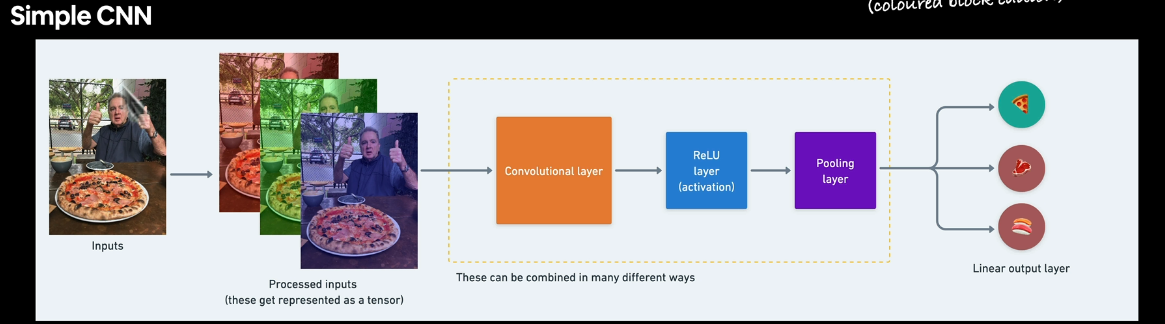

Resource - https://poloclub.github.io/cnn-explainer/

In [69]:
from torch import nn

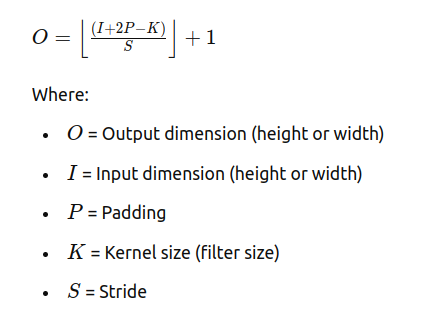

In [83]:
class FashionMNISTModelV21(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
                    
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )

    def forward(self, x):

        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)

        # print(x.shape)
        return x 

torch.manual_seed(42)
model_2 = FashionMNISTModelV21(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)

'''  
Initial Input Shape: (1,28,28)
After conv_block_1: (10,14,14)
After conv_block_2: (10,7,7)
After Flattening: (490)
After Fully Connected Layer: (10)
'''
model_2

FashionMNISTModelV21(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [73]:
image.shape

torch.Size([1, 28, 28])

In [74]:
# model_2.state_dict()

In [75]:
flatten1 = nn.Flatten()

t1 = torch.rand(13,13,10)

x = flatten1(t1)
x.shape

torch.Size([13, 130])

'''  
Initial Input Shape: (1,28,28)
After conv_block_1: (10,14,14)
After conv_block_2: (10,7,7)
After Flattening: (490)
After Fully Connected Layer: (10)
'''

In [76]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

In [77]:
from helper_functions import accuracy_fn

In [80]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(train_dataloader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        device=device
    )
    test_step(test_dataloader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
Looked at 0/60000 samples
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10])
torch.Size([32, 10, 14, 14])
to

In [100]:
# Get model_2 results 
model_2_results = eval_model_1(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV21',
 'model_loss': 2.3023061752319336,
 'model_acc': 9.994009584664537}

In [96]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTV0,0.477801,83.336661
1,FashionMNISTV1,0.685001,75.019968
2,FashionMNISTModelV21,2.302306,9.994010


In [97]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTV0,0.477801,83.336661,14.601731
1,FashionMNISTV1,0.685001,75.019968,10.844551
2,FashionMNISTModelV21,2.302306,9.994010,15.082028


In [101]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [102]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV21(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [106]:
loaded_model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      